In [309]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [310]:
df = pd.read_csv('prosperLoanData.csv')

In [311]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [338]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [183]:
# remove currency symbol from price and convert to numeric
df['price'] = df['price'].str.replace('$', '')\
    .str.replace(',', '').astype(float)

In [390]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

class Charts():
    
    def __init__(self, data):
        self.data = data
        self.color = sb.color_palette()[0]
   #plot_pie
 
        
    def plot_hist(self, col):
         
        bin_min = self.data[col].min()
        bin_max = self.data[col].max()
            
        bin_step = round((bin_max-bin_min)/10, 2)    
            
        bin_max_new = bin_min + 10*bin_step
        
        plt.figure(figsize=[14.70, 8.27])
        
        bin_edges = np.arange(bin_min, bin_max+bin_step, bin_step)
        plt.hist(data=self.data, x=col, bins=bin_edges)

        plt.xlabel("{}".format(col))
        plt.ylabel('Count')
        plt.title("Distribution of {}".format(col))
        plt.xticks(np.arange(bin_min, bin_max_new, bin_step))
        plt.show()
        

    def plot_scatter(self, xcol, ycol, hue = None):
        plt.figure(figsize=[14.70, 8.27])
        sb.scatterplot(data=self.data, x=xcol, y=ycol, hue=hue)
        plt.title('{} by {}'.format(ycol, xcol))
        plt.show()
        
    def plot_bar(self, xcol, ycol, func):
        plt.figure(figsize=[14.70, 8.27])

        counts = self.data.groupby(xcol)[ycol].agg(func).reset_index()
        sb.barplot(x=xcol, y=ycol, data=counts, color=self.color)
        plt.xlabel(xcol)
        plt.ylabel('{} of {}'.format(func, ycol))
        plt.title('{} of {} per {}'.format(func, ycol, xcol))
        plt.show()

    def plot_count(self, xcol, hue = None):
        plt.figure(figsize=[14.70, 8.27])

        sb.countplot(data=self.data, x=xcol, hue=hue, color=self.color)
        plt.xlabel(xcol)
        plt.ylabel('Count')
        plt.title('Count of {}'.format(xcol))
        plt.show()
        
        
    def plot_line(self, xcol, ycol, hue = None):
        plt.figure(figsize=[14.70, 8.27])
        sb.pointplot(data=self.data, x=xcol, y=ycol, hue = hue)
        plt.xlabel(xcol)
        plt.ylabel(ycol)
        plt.title("{} per {}".format(ycol, xcol))
        plt.show()        

    def plot_box(self, xcol, ycol):
        plt.figure(figsize=[14.70, 8.27])
        sb.boxplot(data=self.data, x=xcol, y=ycol, color=self.color)
        plt.xlabel(xcol)
        plt.ylabel(ycol)
        plt.title("{} per {}".format(ycol, xcol))
        plt.show() 
        
        
    def plot_violin(self, xcol, ycol):
        plt.figure(figsize=[14.70, 8.27])
        sb.violinplot(data=self.data, x=xcol, y=ycol, color=self.color)
        plt.xlabel(xcol)
        plt.ylabel(ycol)
        plt.title("{} per {}".format(ycol, xcol))
        plt.show() 
        
        
    def plot_bar_with_line(self, xcol, bar_col, line_col, bar_func, line_func):
        fig, ax1 = plt.subplots(figsize=[14.70, 8.27])
        
        counts = df.groupby(xcol).agg({bar_col: bar_func, line_col: line_func}).reset_index()
        
        base_color = sb.color_palette()[0]
        
        color = 'tab:red'
        
        a = sb.barplot(data=counts[[xcol, bar_col]],
               x=xcol,
               y=bar_col,
               color=self.color,
               ax=ax1)
        
        a.set_xticklabels(a.get_xticks(), size=12)
        
        ax1.set_ylabel('{} of {}'.format(bar_func, bar_col), fontsize=15)
        ax2 = ax1.twinx()
        
        b = sb.pointplot(data=counts,
                 x=xcol,
                 y=line_col,
                 color=color, ax=ax2)
        ax2.set_ylabel('{} {} per {}'.format(line_func, line_col, xcol), fontsize=15)
        ax1.set_xlabel(xcol, fontsize=15)
        ax1.set_ylabel('{} per {}'.format(bar_func, xcol), fontsize=15)
        ax1.tick_params(labelrotation=45)
        ax1.set_title("{} distribution".format(xcol),
              fontsize=15)

        fig.tight_layout()
        plt.show()
        

In [391]:
chart_one = Charts(df)

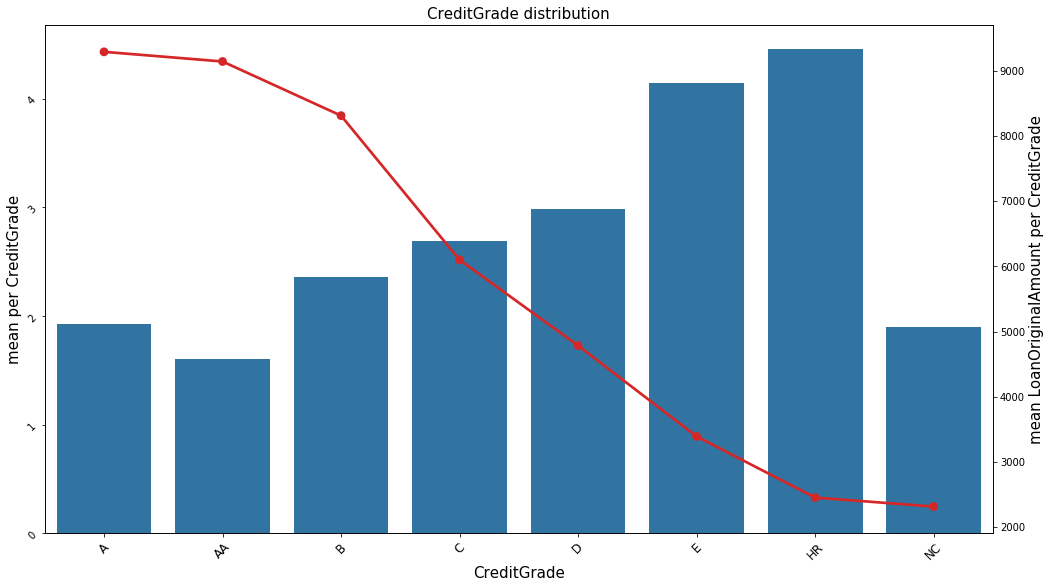

In [392]:
chart_one.plot_bar_with_line(xcol='CreditGrade', bar_col='InquiriesLast6Months', line_col='LoanOriginalAmount' ,bar_func='mean', line_func='mean')

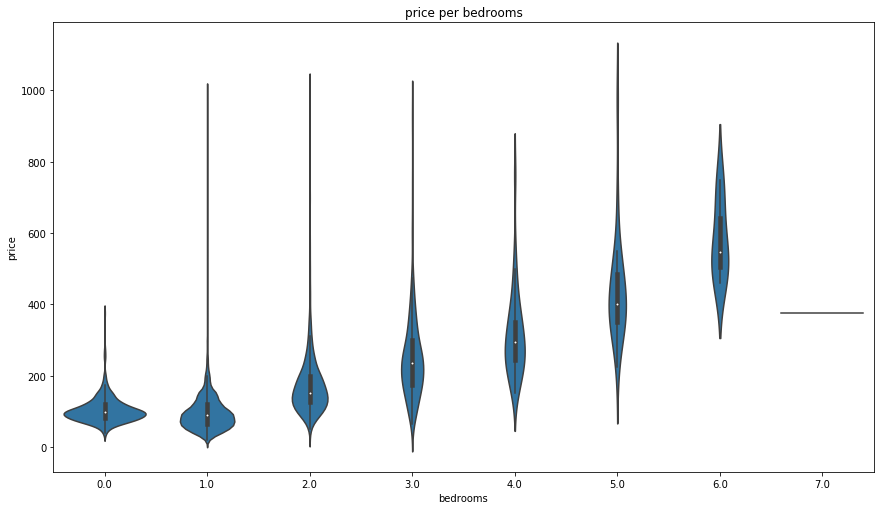

In [259]:
chart_one.plot_violin(xcol='bedrooms', ycol='price')

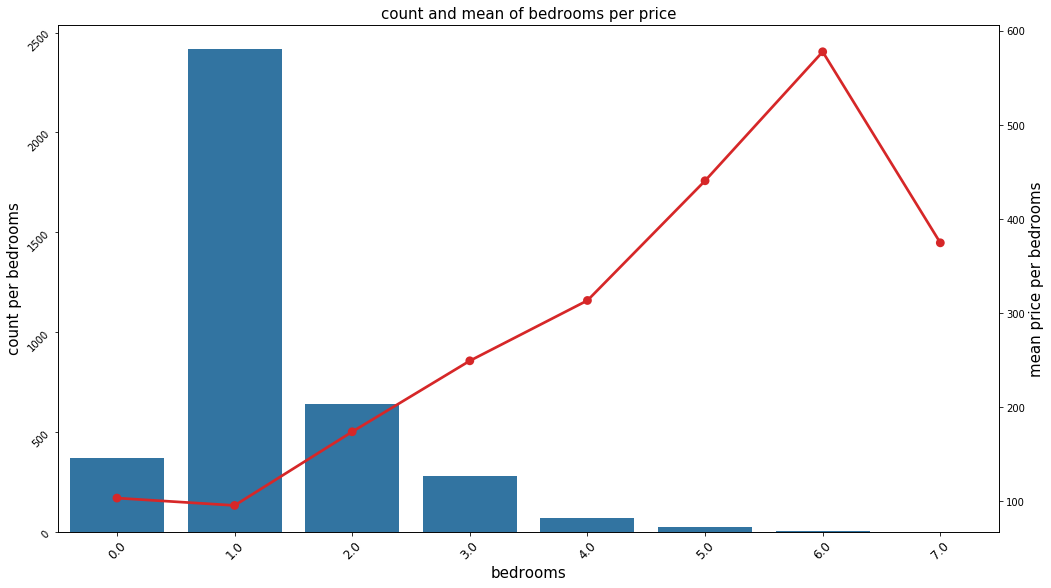

In [272]:
chart_one.plot_bar_with_line('bedrooms', 'price', 'count', 'mean')

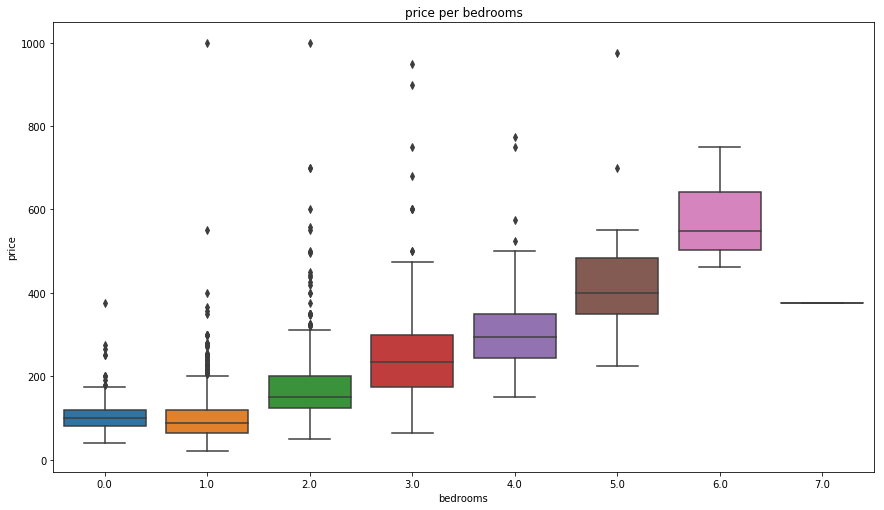

In [186]:
chart_one.plot_box(xcol='bedrooms', ycol='price')

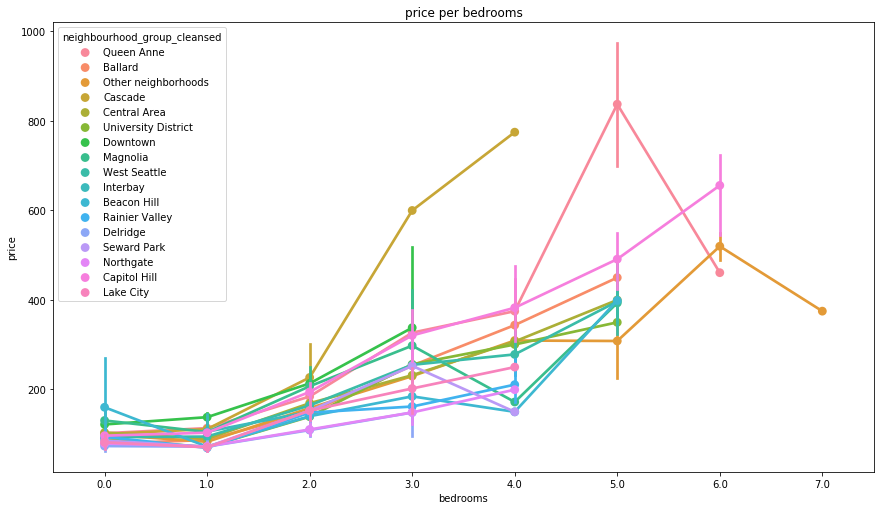

In [179]:
chart_one.plot_line(xcol='bedrooms', ycol='price', hue = 'neighbourhood_group_cleansed')

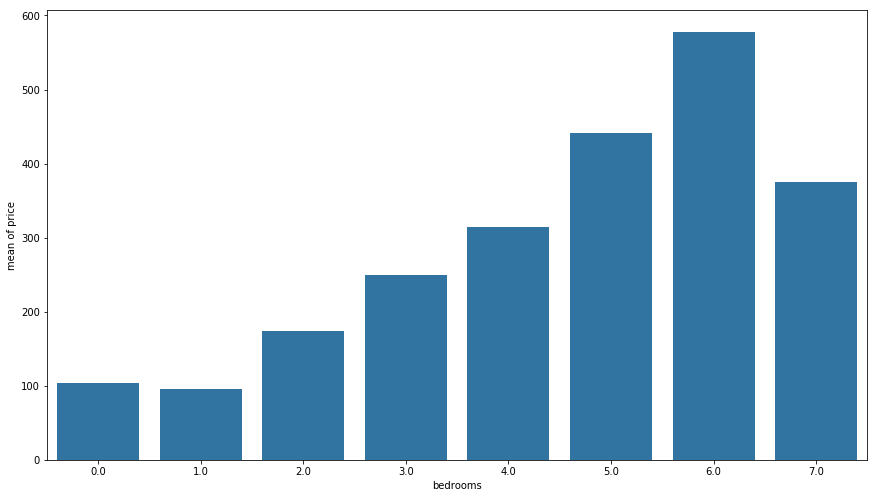

In [273]:
chart_one.plot_bar(xcol='bedrooms', ycol='price', function='mean',sort_by='price')

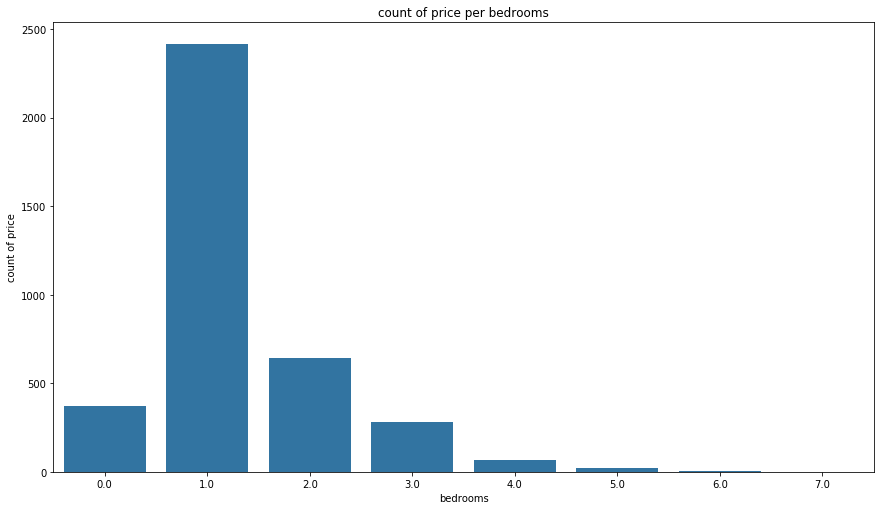

In [297]:
chart_one.plot_bar(xcol='bedrooms', ycol='price', function='count',sort_by='price')

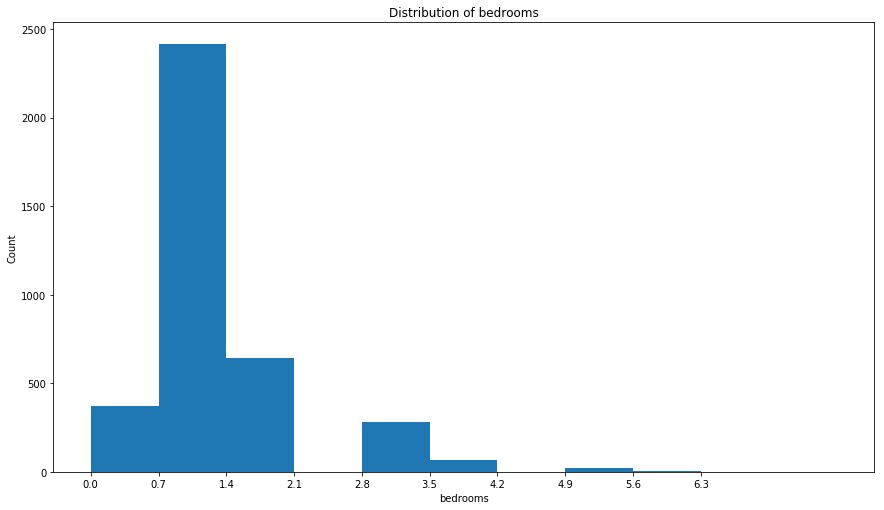

In [298]:
chart_one.plot_hist('bedrooms')

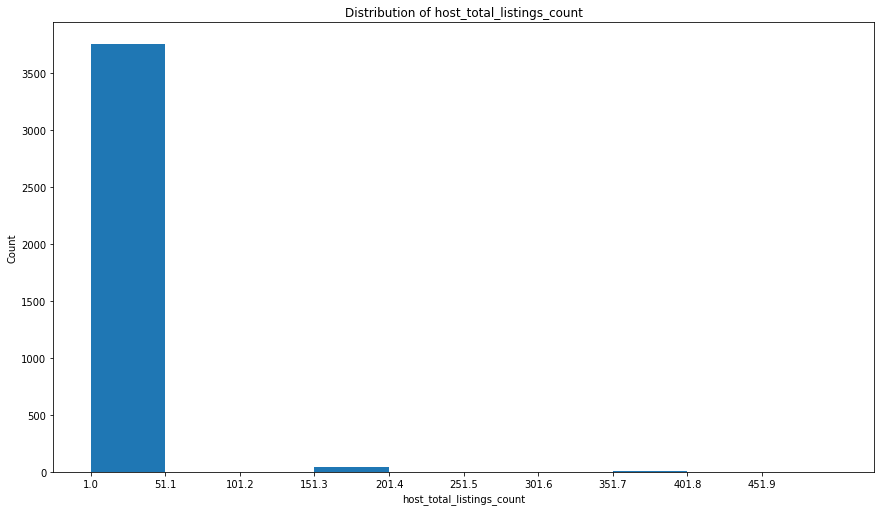

In [275]:
chart_one.plot_hist('host_total_listings_count')

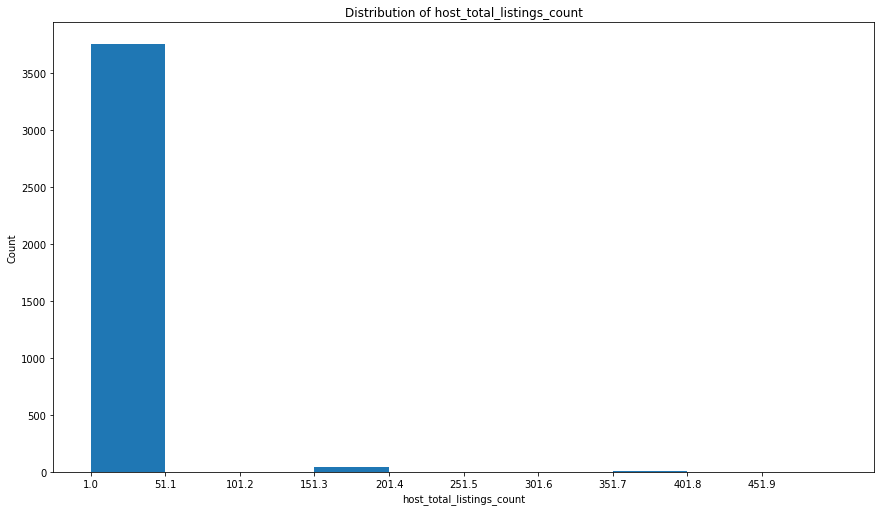

In [274]:
chart_one.plot_hist('host_total_listings_count')